<a href="https://colab.research.google.com/github/VHP2305/Online_Retail_Customer_Segmentation/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Online Retail Customer Segmentation**



##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Vishal Patel (Individual)

# **Project Summary -**

The project focuses on a UK-based non-store online retail business that specializes in unique all-occasion gifts. The goal is to uncover the major customer segments of the business using a transaction data set that contains information on customer transactions, such as invoice number, product code, description, quantity, invoice date, unit price, customer ID, and country. By analyzing this data, we aim to identify different customer segments based on their purchasing behavior and characteristics, such as demographics, purchasing frequency, and average spend. The insights gained from this analysis can help the business optimize its marketing and sales strategies to better serve its customers, ultimately improving customer satisfaction and increasing revenue.

## **GitHub Link -** https://github.com/VHP2305/Online_Retail_Customer_Segmentation

# **Problem Statement**


The objective of this project is to analyze the transaction data of a UK-based non-store online retail business that specializes in unique all-occasion gifts and identify the major customer segments based on their purchasing behavior and characteristics. The data set includes information on invoice number, product code, description, quantity, invoice date, unit price, customer ID, and country. The goal is to gain insights into the different customer segments, their behavior, and their needs, in order to optimize the business's marketing and sales strategies. This analysis can help the business better understand its customers and tailor its offerings to their preferences and needs.

### Variables Description

#**<b> Data Description </b>**

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. 
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# ***Let's Begin !***

## **Know Your Data**

# **Importing Library**

In [1]:
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

#**Loading Data**

In [2]:
# Import the drive module from the google.colab library
from google.colab import drive

# Mount the drive onto the '/content/drive' directory
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
#Read the dataset file
retail_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ML Module/Unsupervised Capstone Project/Online Retail.xlsx')

In [4]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# **The EDA process starts with the following steps -**

### Dataset First View

In [5]:
# Displaying the first 5 rows of the dataset
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [6]:
# Finding the number of rows and columns in the dataset
rows, columns = retail_df.shape

# Printing the number of rows and columns in the dataset
print('The dataset has', rows, 'rows and', columns, 'columns.')

The dataset has 541909 rows and 8 columns.


### Columns

In [7]:
# Storing the column names of the dataset in a variable
columns = retail_df.columns

# Printing the column names
print('Column Names:')
print(columns)

Column Names:
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


### Dataset Information

In [8]:
# Getting information about the dataset
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Our dataset has **541909** rows and **8** columns, but we have missing information in two of the columns. The **CustomerID** column has **406829** values, meaning that some information is missing. The same is true for the **Description** column. It's important to keep in mind these missing values when analyzing our dataset.

In [9]:
# Calculate descriptive statistics for the retail data
# The describe function calculates various summary statistics of the data in the DataFrame
# The optional argument [0.75,0.95,0.99] calculates quantiles at the specified values

retail_df.describe([0.75,0.95,0.99])


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
95%,29.000000,9.950000,17905.000000
99%,100.000000,18.000000,18212.000000
max,80995.000000,38970.000000,18287.000000


When looking at the summary statistics generated by the describe function, it is apparent that some negative values exist in the data. These negative values might indicate that products were returned or cancelled. Another noteworthy observation is that the 99th percentile for both the UnitPrice and Quantity columns is low, while the maximum value is much higher. This suggests that there are outliers in the data, which could be due to the occasional purchase of valuable items. Additionally, the UnitPrice and Quantity columns are inversely related to each other.

# **Getting Unique Values**

In [10]:
# Checking the number of unique values for each column in the dataset
retail_df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [11]:
# Count the number of unique values in the InvoiceNo column
transactions = retail_df['InvoiceNo'].nunique()

# Count the number of unique values in the StockCode column
products_bought = retail_df['StockCode'].nunique()

# Count the number of unique values in the CustomerID column
customers = retail_df['CustomerID'].nunique()

# Calculate the percentage of missing customer information
missing_customers = round(retail_df['CustomerID'].isnull().sum() * 100 / len(retail_df), 2)

# Count the number of unique values in the Country column
countries = retail_df['Country'].nunique()

# Print the results
print("Number of transactions: ", transactions)
print("Number of products bought: ", products_bought)
print("Number of customers:", customers)
print("Percentage of customers NA: ", missing_customers, "%")
print('Number of countries: ', countries)


Number of transactions:  25900
Number of products bought:  4070
Number of customers: 4372
Percentage of customers NA:  24.93 %
Number of countries:  38


**Observation**: A significant portion of customer data is not available, indicated by the high number of NA values.

## **The number of unique items in the dataset.**

In [12]:
# Get the unique values of the StockCode column
unique_stock_codes = retail_df.StockCode.unique()

# Get the shape (number of rows and columns) of the unique values of the StockCode column
stock_code_shape = unique_stock_codes.shape

# Print the result
print("Shape of unique values of StockCode column:", stock_code_shape)

Shape of unique values of StockCode column: (4070,)


In [13]:
# Get the unique values in the Description column
unique_descriptions = retail_df.Description.unique()

# Get the number of unique values in the Description column
num_unique_descriptions = unique_descriptions.shape

# Print the result
print("Number of unique descriptions:", num_unique_descriptions[0])

Number of unique descriptions: 4224


## The descriptions of the items in the dataset show that there are more descriptions than stock codes, meaning that some stock codes have multiple descriptions associated with them.

# **Stockcode which have more than one description**

In [14]:
# Group the retail data by the StockCode and Description columns
cat_des_df = retail_df.groupby(["StockCode", "Description"]).count().reset_index()

In [15]:
# Get the StockCode value counts where the count is greater than 1
# Reset the index and get the first 10 rows
head_stock_codes = (cat_des_df.StockCode.value_counts()[cat_des_df.StockCode.value_counts() > 1]
                    .reset_index().head(10))

# Show the result
head_stock_codes

,index,StockCode
0,20713,8
1,23084,7
2,21830,6
3,85175,6
4,85172,5
5,72807A,5
6,23343,5
7,23131,5
8,21181,5
9,21829,4


**Example of one such stockcode**

In [16]:
# Get the 7th most common StockCode
selected_stock_code = cat_des_df.StockCode.value_counts().reset_index()['index'][6]

# Get the unique descriptions for the selected stock code
unique_descriptions = retail_df[retail_df['StockCode'] == selected_stock_code]['Description'].unique()

# Print the result
print("Unique descriptions for stock code", selected_stock_code, ":", unique_descriptions)

Unique descriptions for stock code 23343 : ['JUMBO BAG VINTAGE CHRISTMAS ' 'came coded as 20713'
 'wrongly coded 20713' '20713 wrongly marked' 20713]


# **Examining invoices that have been Cancelled.**

##We will look for invoices with the letter "c" in the InvoiceNo column to see if there is an invoice with the quantity of -80995. If so, this would confirm that negative quantities correspond to cancelled orders.

In [17]:
# Create a variable 'cancelled_orders' to store all the rows in 'retail_df' where the value in the 'InvoiceNo' column contains the character 'C'
cancelled_orders = retail_df[retail_df['InvoiceNo'].astype(str).str.contains('C')]

# Display the first 5 rows of 'cancelled_orders' dataframe
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [18]:
# Find a transaction where the quantity is -80995
cancelled_orders[cancelled_orders['Quantity']==-80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


##As expected, negative values in the Quantity column indicate that the order was cancelled.

# **Let's see how many cancelled orders there are in the data set.**

In [19]:
# Get the number of unique invoice numbers in the retail_df DataFrame
total_orders_count = retail_df['InvoiceNo'].nunique()

# Get the number of rows in the cancelled_orders DataFrame
cancelled_orders_count = len(cancelled_orders)

# Calculate the percentage of cancelled orders as a fraction of the total number of orders
cancelled_orders_percentage = cancelled_orders_count / total_orders_count * 100

# Print the results
print(f"Number of cancelled orders: {cancelled_orders_count}")
print(f"Percentage of cancelled orders: {cancelled_orders_percentage:.2f}%")

Number of cancelled orders: 9288
Percentage of cancelled orders: 35.86%


##Observation : A large number of orders, 35.86%, were cancelled. Analyzing these cancelled orders could help prevent cancellations in the future.

# **Determine the top 10 countries with the most cancelled orders.**

In [20]:
# Determine the number of cancelled orders for each country
cancel_order_country = cancelled_orders.groupby('Country')['InvoiceNo'].count().reset_index()

# Sort the country-wise count of cancelled orders in descending order and get the top 10 countries
cancel_order_country_top10 = cancel_order_country.sort_values('InvoiceNo',ascending=False, ignore_index=True).head(10)
cancel_order_country_top10

,Country,InvoiceNo
0,United Kingdom,7856
1,Germany,453
2,EIRE,302
3,France,149
4,USA,112
5,Australia,74
6,Spain,48
7,Italy,45
8,Belgium,38
9,Japan,37


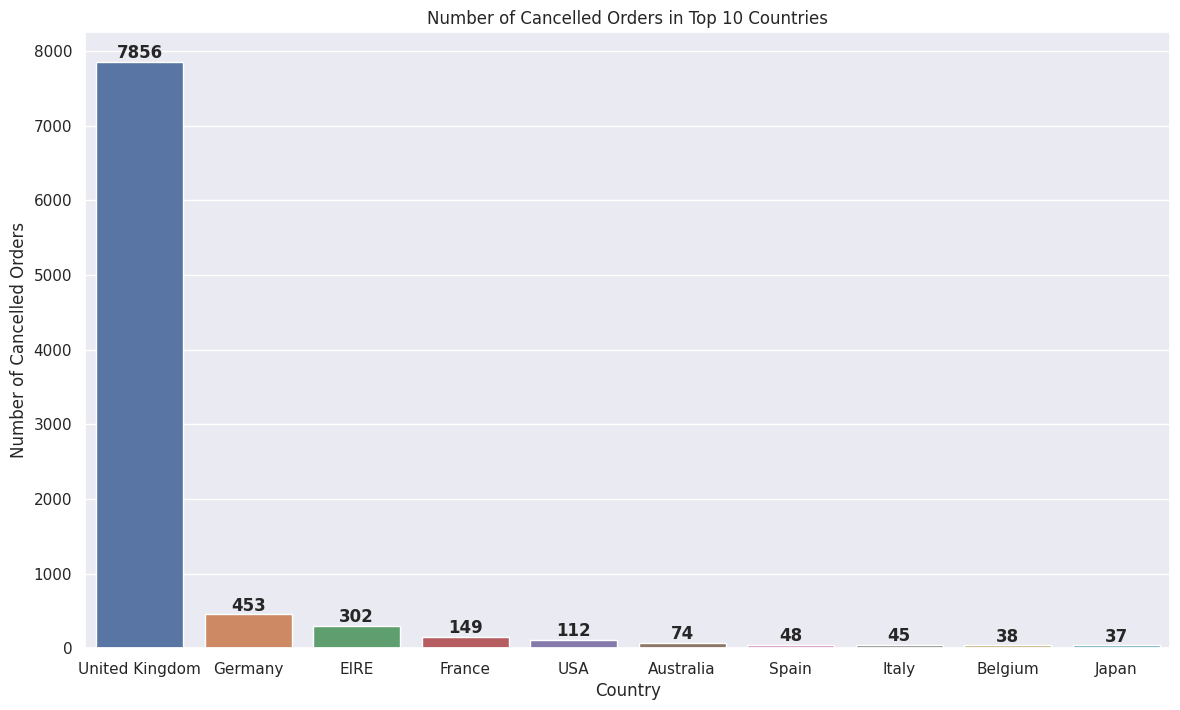

In [21]:
# Set the size of the figure to be displayed
plt.figure(figsize=(14,8))

# Plot the bar chart using Seaborn
sns.barplot(x='Country', y='InvoiceNo', data=cancel_order_country_top10)

# Add annotations on the bar charts
for i, v in enumerate(cancel_order_country_top10['InvoiceNo']):
    plt.text(i, v+50, str(v), ha='center', fontweight='bold')

# Add labels and title to the chart
plt.xlabel('Country') # Label for the x-axis
plt.ylabel('Number of Cancelled Orders') # Label for the y-axis
plt.title('Number of Cancelled Orders in Top 10 Countries') # Title for the chart

# Show the plot
plt.show()

1. A bar chart was chosen to display the number of cancelled orders in the top 10 countries because it is an effective way to compare and visualize data.

2. The chart provides insight into the countries with the highest number of cancelled orders, which can help businesses identify potential issues with customer satisfaction or logistical issues.

3. The insights gained from the chart can help businesses improve their customer satisfaction and logistics processes, potentially leading to fewer cancelled orders and increased revenue.

#**Average Number of Orders per Customer**

In [22]:
# Group the retail data by customer ID and count the number of unique invoices for each customer ID
groupby_customers = pd.DataFrame(retail_df.groupby("CustomerID")["InvoiceNo"].nunique())

# Display the first 5 rows of the resulting dataframe
print(groupby_customers.head())

            InvoiceNo
CustomerID           
12346.0             2
12347.0             7
12348.0             4
12349.0             1
12350.0             1


In [23]:
# Display summary statistics for the groupby_customers dataframe
groupby_customers.describe()

,InvoiceNo
count,4372.000000
mean,5.075480
std,9.338754
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,248.000000


#**Observation :** On average, each customer places 5 orders.

### **Let's examine how many different products are purchased, as we found in the description of our dataframe that 75% of customers buy a quantity of 10.**

In [24]:
# Group the retail_df dataframe by InvoiceNo and CustomerID
temp_df = retail_df.groupby(['InvoiceNo','CustomerID'], as_index=False)

# Count the number of products in each invoice
temp_df = temp_df['InvoiceDate'].count()

# Rename the column 'InvoiceDate' to 'Number of products'
transaction_df = temp_df.rename(columns = {'InvoiceDate':'Number of products'})

# Print the result
print(transaction_df.head())

  InvoiceNo  CustomerID  Number of products
0    536365     17850.0                   7
1    536366     17850.0                   2
2    536367     13047.0                  12
3    536368     13047.0                   4
4    536369     13047.0                   1


In [25]:
# Getting descriptive statistics 
transaction_df.describe()

,CustomerID,Number of products
count,22190.000000,22190.000000
mean,15238.498738,18.333889
std,1733.149624,23.892111
min,12346.000000,1.000000
25%,13755.000000,3.000000
50%,15136.000000,12.000000
75%,16746.000000,24.000000
max,18287.000000,542.000000


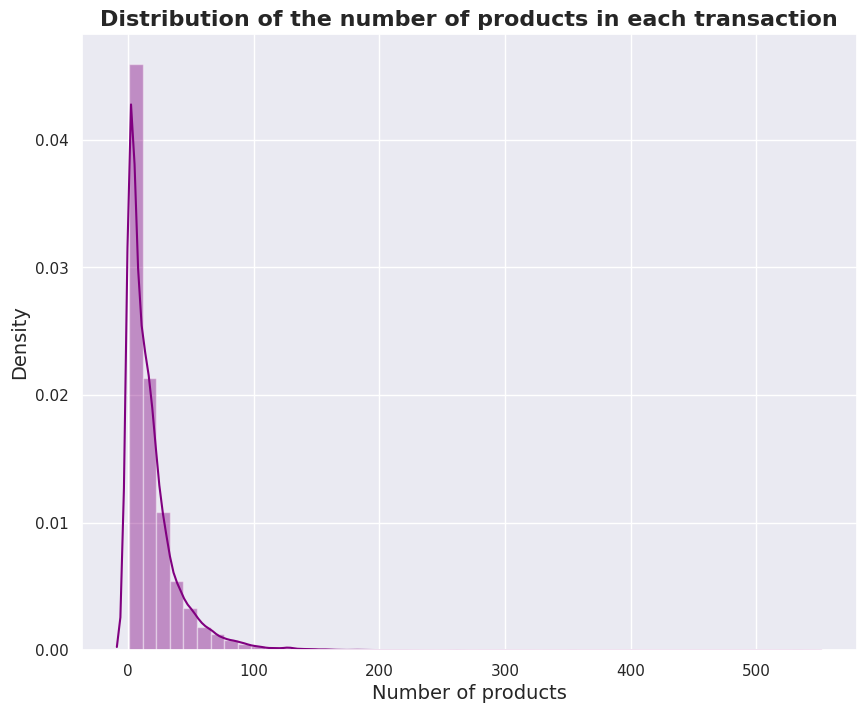

In [26]:
# Set the size of the plot
plt.figure(figsize=(10, 8))

# Plot the distribution of the number of products in each transaction
sns.distplot(transaction_df['Number of products'], color='purple')

# Add a title to the plot
plt.title("Distribution of the number of products in each transaction", fontsize=16, fontweight='bold')

# Add a label to the x-axis
plt.xlabel("Number of products", fontsize=14)

# Add a label to the y-axis
plt.ylabel("Density", fontsize=14)

# Show the plot
plt.show()

1. A histogram was chosen to visualize the distribution of the number of products in each transaction because it allows us to see the frequency of different values in a continuous variable.

2. The distribution of the number of products in each transaction is heavily skewed. The majority of customers purchase fewer than 25 items in a single transaction.

3. The insights gained from this histogram could be used to inform decisions about inventory management and product pricing. For example, if the data shows that most transactions involve only one or two products, a business may decide to focus on promoting those particular products or adjusting pricing to encourage customers to purchase more items per transaction.

# **Cleaning Dataset**

### Missing Values/Null Values

In [27]:
# Missing values
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = retail_df.isnull().sum().sort_values(ascending = False)
    percent = round(retail_df.isnull().sum()/len(retail_df)*100,2).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

# Missing value percentage 
print(missing_percentage(retail_df))

              Total  Percent
CustomerID   135080    24.93
Description    1454     0.27
InvoiceNo         0     0.00
StockCode         0     0.00
Quantity          0     0.00
InvoiceDate       0     0.00
UnitPrice         0     0.00
Country           0     0.00


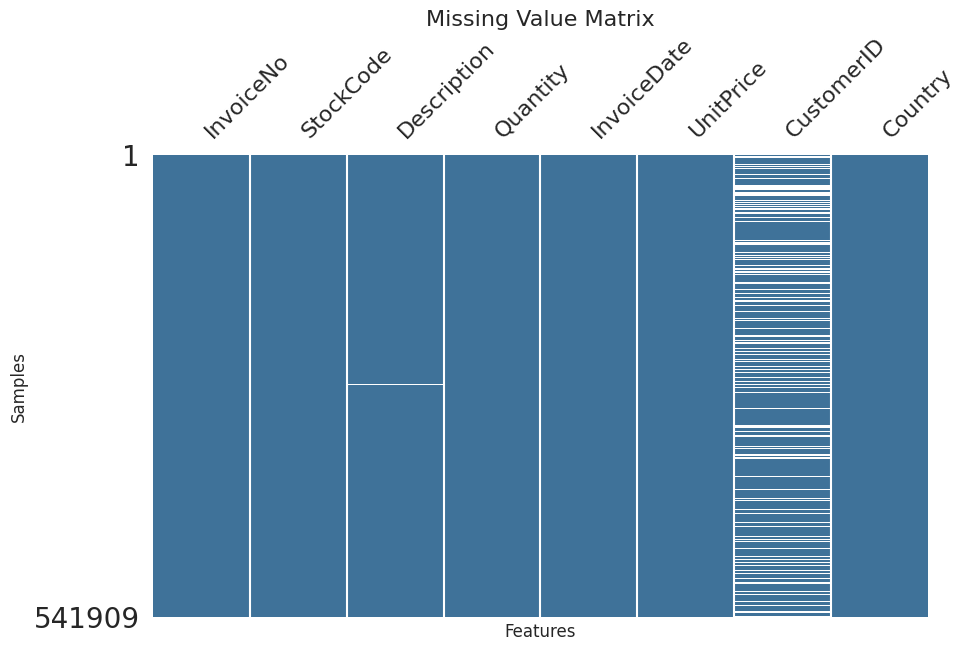

In [28]:
# Visualizing the missing values
import missingno as msno

# create missing value matrix plot
msno.matrix(retail_df, figsize=(10,6), sparkline=False, color=(0.25, 0.45, 0.6))

# customize plot
plt.title('Missing Value Matrix', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Samples', fontsize=12)
plt.show()

In [29]:
# Make a copy of the original retail data dataframe
retail_df_copy = retail_df.copy()

## **Removing the Cancelled order.**

In [30]:
# Filter the copied dataframe to only include rows where the 'Quantity' column is greater than 0
retail_df_copy = retail_df_copy[retail_df_copy['Quantity'] > 0]

# Check the shape of the filtered dataframe
print("Number of rows:", retail_df_copy.shape[0], "Number of columns:", retail_df_copy.shape[1])

Number of rows: 531285 Number of columns: 8


## **Removing NA values.**

In [31]:
# Remove all rows with missing values in the 'CustomerID' column
retail_df_copy.dropna(subset=['CustomerID'], how='all', inplace=True)

# Check the shape of the updated dataframe
print(retail_df_copy.shape)

(397924, 8)


In [32]:
# Check for missing values in the copied dataframe after removing NA values in 'CustomerID' column
retail_df_copy.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Duplicate Values

In [33]:
# Check for duplicates in the retail dataframe
retail_df.duplicated().sum()

5268

### **Removing Duplicates**

In [34]:
# remove duplicates in place in the retail_df_copy dataframe
retail_df_copy.drop_duplicates(inplace=True)

In [35]:
# Checking shape after cleaning
retail_df_copy.shape

(392732, 8)

#### What all missing value imputation techniques have you used and why did you use those techniques?

The missing value imputation technique used was dropping rows with missing values in the 'CustomerID' column. This approach was chosen because 'CustomerID' is a key identifier and dropping rows with missing values had minimal impact on the size of the dataset. Other imputation techniques such as imputing mean, median, or mode values were not utilized in this case.

### What did you know about your dataset?

The dataset includes information about transactions from a UK-based, non-store online retail business that specializes in unique all-occasion gifts. The data covers a period of one year, from 01/12/2010 to 09/12/2011, and contains information about each transaction, including the invoice number, product code, product name, quantity, invoice date and time, unit price, customer ID, and country. The dataset could be used to perform various types of analyses, including customer segmentation, sales forecasting, and inventory management.

## Exploring the unique values of each attribute

In [36]:
print("Summary..")

# Get the column names in the dataframe
column_names = retail_df_copy.columns

# Loop through each column name
for column_name in column_names:
    # Get the number of unique values in the column
    unique_values = retail_df_copy[column_name].nunique()
        
    # Print the summary for the column
    print("Attribute:", column_name)
    print("Number of unique values:", unique_values)

Summary..
Attribute: InvoiceNo
Number of unique values: 18536
Attribute: StockCode
Number of unique values: 3665
Attribute: Description
Number of unique values: 3877
Attribute: Quantity
Number of unique values: 302
Attribute: InvoiceDate
Number of unique values: 17286
Attribute: UnitPrice
Number of unique values: 441
Attribute: CustomerID
Number of unique values: 4339
Attribute: Country
Number of unique values: 37


## **Feature Engineering: Creating 'total_cost' column in retail data by multiplying 'Quantity' and 'UnitPrice' columns.**

In [37]:
# create a new column 'total_cost' in the dataframe 'retail_df_copy'
retail_df_copy['total_cost'] = retail_df_copy['Quantity'] * retail_df_copy['UnitPrice']

In [38]:
# display the first 5 rows of the dataframe 'retail_df_copy'
retail_df_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
